# Advance Lane Finding Pipeline
In the Previous project, Canny edge detection and Hough Transformation have limitations on handling shadows, and the constant threshold would not play well with a constantly changing driving environment. A more robust image process logic is require to get a good lane detecting result

## Approach to a more robust Lane Finding Algorithms 
The approach would be shown in the following steps
1. Camera Calibration and Distortion Correction
2. Color and Gradient Threshold Filter
3. Perspective Transform Calculation
4. Sliding Window Lane Line Finding
5. Curvature Measurement

### Package Import

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#glob is used to reading all the similar calbration image
import glob


### Camera Calibration
Using Chessboard images taken from different angle to calibrate the image distortion for our camera

In [2]:
# import all cal images
cal_images = glob.glob ('camera_cal/calibration*.jpg')

# Arrays to store object points and image points from all images

objpoints = []
imgpoints = []

# Obj points should not change and only based on the chesss board format
# Preparing object points, like (0,0,0), (1,0,0) ...
objp = np.zeros((6*9,3),np.float32)
 
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # Creating x y coordinates

for fname in cal_images:
    # read in each image
    img = mpimg.imread(fname)
    
    # Convert to gray scale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    # Find Chesse board corners
    ret, corners = cv2.findChessboardCorners (gray, (9,6),None)
    
    if ret:
        imgpoints.append(corners)
        objpoints.append(objp)
        
        img = cv2.drawChessboardCorners(img,(9,6),corners,ret)
        #print (fname)
        mpimg.imsave('temp_output/'+fname, img)

Here is the output check on the finding corners
![corners](temp_output/camera_cal/calibration2.jpg)
Once I have all the Corners found and append into the imgpoints, I can operate camera calibration by using cv2 camera calibration

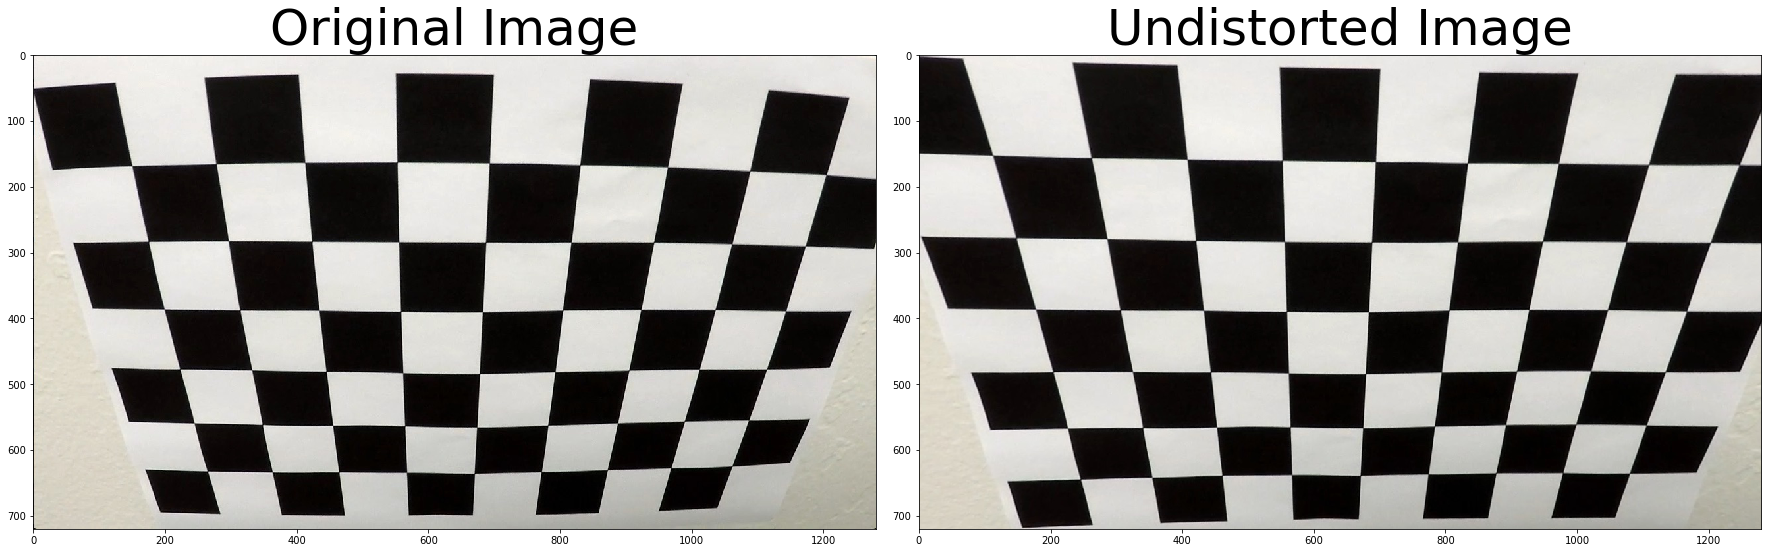

In [3]:

ret,mtx,dist,rvecs,tvecs = cv2.calibrateCamera(objpoints,imgpoints,
                                               img.shape[1:],None,None)
# Test the undistort on calibration2.jpg
test_undis_img = mpimg.imread('camera_cal/calibration2.jpg')
undist = cv2.undistort(test_undis_img,mtx,dist,None,mtx)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(test_undis_img)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(undist)
ax2.set_title('Undistorted Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)


### Color Threshold
Let's find out which color space is the best for our test images

First let's have a function will print all plots to visullize the reslut. This plot method is refereced from [Naoki Shibuya](https://github.com/naokishibuya/car-finding-lane-lines)

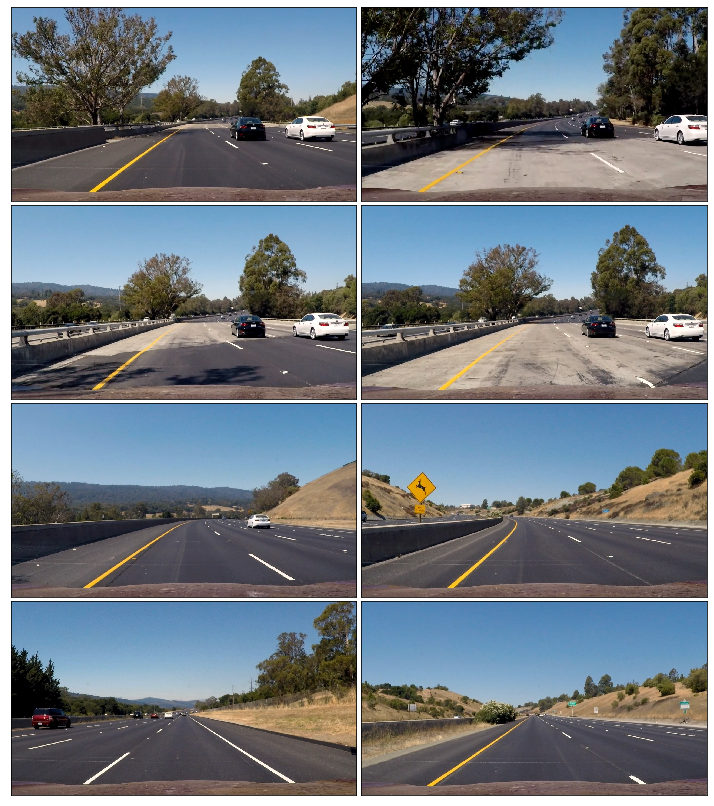

In [4]:
def show_images(images, cols = 2, cmap=None):
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(10, 11))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()
    
test_images = [plt.imread(path) for path in glob.glob('test_images/*.jpg')]
show_images(test_images)

Now lets try RGB filter frist

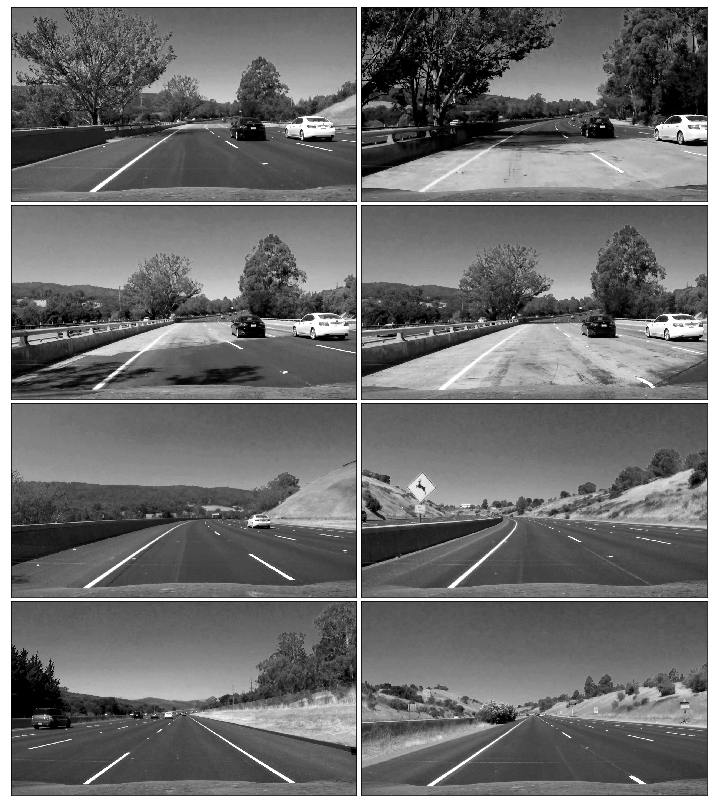

In [11]:
def covert_r (image):
    R = np.zeros_like(image)  
    R[:,:,0] =image[:,:,0]
    return  cv2.cvtColor(R,cv2.COLOR_RGB2GRAY)

show_images(list(map(covert_rgb,test_images)))